In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. 개인소득금액 데이터

In [3]:
income = pd.read_csv('./경기도&서울시 소득금액(3표준편차이상치).csv') 

In [4]:
income

,시군구,count,mean,sum,median
0,가평군,1678,2944.047080,4940111,2951.0
1,강남구,21194,3694.446825,78300106,3499.0
2,강동구,18661,3460.844381,64582817,3449.0
3,강북구,13654,3247.365314,44339526,3247.0
4,강서구,24472,3422.620260,83758363,3320.0
5,고양시,35844,3316.568240,118879072,3253.0
6,과천시,1969,3449.382428,6791834,3289.0
7,관악구,19417,3228.791214,62693439,3245.0
8,광명시,12000,3125.449583,37505395,3194.0
9,광주시,11700,3184.465214,37258243,3225.0


In [5]:
# 시군구 및 개인소득금액의 median 변수만 추출
income_med = income[['시군구','median']]

## 2. 업종별 매출금액 데이터

In [6]:
data = pd.read_csv("./지역별_업종별_매출_2020_2021.csv")

In [7]:
# 소분류 업종명 파일
category = pd.read_csv("./서비스업종소분류_업종테이블.csv",encoding = "cp949")

In [8]:
# 우편번호별 시군구 변수 생성
conditions = [
        (data['nw_zp_3'] >= 10) & (data['nw_zp_3'] <= 12),
        (data['nw_zp_3'] >= 13) & (data['nw_zp_3'] <= 15),
        (data['nw_zp_3'] >= 16) & (data['nw_zp_3'] <= 19),
        (data['nw_zp_3'] >= 20) & (data['nw_zp_3'] <= 23),
        (data['nw_zp_3'] >= 24) & (data['nw_zp_3'] <= 26),
        (data['nw_zp_3'] >= 27) & (data['nw_zp_3'] <= 29),
        (data['nw_zp_3'] >= 30) & (data['nw_zp_3'] <= 32),
        (data['nw_zp_3'] >= 33) & (data['nw_zp_3'] <= 35),
        (data['nw_zp_3'] >= 36) & (data['nw_zp_3'] <= 38),
        (data['nw_zp_3'] >= 39) & (data['nw_zp_3'] <= 42),
        (data['nw_zp_3'] >= 43) & (data['nw_zp_3'] <= 44),
        (data['nw_zp_3'] >= 45) & (data['nw_zp_3'] <= 46),
        (data['nw_zp_3'] >= 47) & (data['nw_zp_3'] <= 48),
        (data['nw_zp_3'] >= 49) & (data['nw_zp_3'] <= 51),
        (data['nw_zp_3'] >= 52) & (data['nw_zp_3'] <= 54),
        (data['nw_zp_3'] >= 55) & (data['nw_zp_3'] <= 59),
        (data['nw_zp_3'] >= 60) & (data['nw_zp_3'] <= 64),
        (data['nw_zp_3'] >= 65) & (data['nw_zp_3'] <= 68),
        (data['nw_zp_3'] >= 69) & (data['nw_zp_3'] <= 71),
        (data['nw_zp_3'] >= 72) & (data['nw_zp_3'] <= 74),
        (data['nw_zp_3'] >= 75) & (data['nw_zp_3'] <= 78),
        (data['nw_zp_3'] >= 79) & (data['nw_zp_3'] <= 81),
        (data['nw_zp_3'] >= 82) & (data['nw_zp_3'] <= 84),
        (data['nw_zp_3'] >= 85) & (data['nw_zp_3'] <= 86),
        (data['nw_zp_3'] >= 87) & (data['nw_zp_3'] <= 88),
        (data['nw_zp_3'] >= 100) & (data['nw_zp_3'] <= 101),
        (data['nw_zp_3'] >= 102) & (data['nw_zp_3'] <= 107),
        (data['nw_zp_3'] >= 108) & (data['nw_zp_3'] <= 109),
        (data['nw_zp_3'] == 110),
        (data['nw_zp_3'] >= 111) & (data['nw_zp_3'] <= 112),
        (data['nw_zp_3'] == 113),
        (data['nw_zp_3'] >= 114) & (data['nw_zp_3'] <= 115),
        (data['nw_zp_3'] >= 116) & (data['nw_zp_3'] <= 118),
        (data['nw_zp_3'] ==119),
        (data['nw_zp_3'] >= 120) & (data['nw_zp_3'] <= 123),
        (data['nw_zp_3'] == 124),
        (data['nw_zp_3'] == 125),
        (data['nw_zp_3'] == 126),
        (data['nw_zp_3'] >= 127) & (data['nw_zp_3'] <= 128),
        (data['nw_zp_3'] >= 129) & (data['nw_zp_3'] <= 130),
        (data['nw_zp_3'] >= 131) & (data['nw_zp_3'] <= 137),
        (data['nw_zp_3'] == 138),
        (data['nw_zp_3'] >= 139) & (data['nw_zp_3'] <= 141),
        (data['nw_zp_3'] >= 142) & (data['nw_zp_3'] <= 143),
        (data['nw_zp_3'] >= 144) & (data['nw_zp_3'] <= 148),
        (data['nw_zp_3'] >= 149) & (data['nw_zp_3'] <= 151),
        (data['nw_zp_3'] >= 152) & (data['nw_zp_3'] <= 157),
        (data['nw_zp_3'] >= 158) & (data['nw_zp_3'] <= 159),
        (data['nw_zp_3'] >= 160) & (data['nw_zp_3'] <= 161),
        (data['nw_zp_3'] >= 162) & (data['nw_zp_3'] <= 167),
        (data['nw_zp_3'] >= 168) & (data['nw_zp_3'] <= 172),
        (data['nw_zp_3'] >= 173) & (data['nw_zp_3'] <= 174),
        (data['nw_zp_3'] >= 175) & (data['nw_zp_3'] <= 176),
        (data['nw_zp_3'] >= 177) & (data['nw_zp_3'] <= 180),
        (data['nw_zp_3'] == 181),       
        (data['nw_zp_3'] >= 182) & (data['nw_zp_3'] <= 186)
         ]

values = ["강북구","도봉구","노원구","중랑구","동대문구","성북구","종로구","은평구","서대문구",
          "마포구","용산구","중구","성동구","광진구","강동구","송파구","강남구","서초구","동작구",
          "영등포구","강서구","양천구","구로구","금천구","관악구","김포시","고양시","파주시",
          "연천군","포천시","동두천시","양주시","의정부시","구리시","남양주시","가평군","양평군",
          "여주시","광주시","하남시","성남시","과천시","안양시","광명시","부천시","시흥시","안산시",
          "군포시","의왕시","수원시","용인시","이천시","안성시","평택시","오산시","화성시"]

import numpy as np
data['시군구'] = np.select(conditions,values)

In [9]:
data

,Unnamed: 0,nw_zp_3,업종코드,매출금액합계,매출건수합계,시군구
0,0,10,ED0101,1.197245e+09,3761.0,강북구
1,1,10,ED0102,3.347315e+08,594.0,강북구
2,2,10,ED0103,2.518485e+08,1783.0,강북구
3,3,10,ED0104,1.135680e+08,353.0,강북구
4,4,10,ED0105,1.998623e+08,1093.0,강북구
...,...,...,...,...,...,...
17280,17280,186,SL1202,2.885536e+08,3799.0,화성시
17281,17281,186,SL1301,1.749243e+07,137.0,화성시
17282,17282,186,SL1402,1.446380e+07,191.0,화성시
17283,17283,186,SL1403,9.334238e+08,3652.0,화성시


In [10]:
# 업종코드, 업종명 변수만 추출
category = category[['svc_tpbuz_scls_cd','svc_tpbuz_scls_nm']]
category.columns = ['업종코드','업종명']

In [11]:
# 시군구, 업종명 기준 groupby, 데이터프레임 생성
sales = pd.merge(data,category, how='left', left_on='업종코드', right_on='업종코드')
sales = sales[['시군구','업종명','매출금액합계','매출건수합계']]
sales = sales.groupby(['시군구','업종명']).agg({'매출금액합계':'sum', '매출건수합계':'sum'}).reset_index()

In [12]:
sales

,시군구,업종명,매출금액합계,매출건수합계
0,가평군,BAR,2.294750e+07,541.0
1,가평군,PC방,1.587721e+08,31700.0
2,가평군,가구,4.300014e+08,2099.0
3,가평군,가스,5.589964e+08,4458.0
4,가평군,갈비/삼겹살/구이,6.162459e+09,108069.0
...,...,...,...,...
6751,화성시,화랑/표구/염료,4.673302e+09,57737.0
6752,화성시,화장품,8.974788e+09,184195.0
6753,화성시,횟집,5.541728e+10,940685.0
6754,화성시,휘트니스센터,1.662478e+10,72394.0


**소득금액 데이터 & 매출합계 데이터 "final" 데이터로 합치기**

In [13]:
final = pd.merge(income_med,sales,how = 'outer',on = '시군구')

In [14]:
final['매출금액합계'] = final['매출금액합계'].apply(lambda x : x/10000)

In [15]:
final

,시군구,median,업종명,매출금액합계,매출건수합계
0,가평군,2951.0,BAR,2.294750e+03,541.0
1,가평군,2951.0,PC방,1.587721e+04,31700.0
2,가평군,2951.0,가구,4.300014e+04,2099.0
3,가평군,2951.0,가스,5.589964e+04,4458.0
4,가평군,2951.0,갈비/삼겹살/구이,6.162459e+05,108069.0
...,...,...,...,...,...
6751,화성시,3249.0,화랑/표구/염료,4.673302e+05,57737.0
6752,화성시,3249.0,화장품,8.974788e+05,184195.0
6753,화성시,3249.0,횟집,5.541728e+06,940685.0
6754,화성시,3249.0,휘트니스센터,1.662478e+06,72394.0


## 3. 강남구 데이터 제외

In [16]:
index = final[final['시군구'] == '강남구'].index
print(index)

Int64Index([116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            ...
            227, 228, 229, 230, 231, 232, 233, 234, 235, 236],
           dtype='int64', length=121)


In [17]:
final_gang = final.drop(index)

## 4. 상관관계 분석
상관계수 기준 0.3 이상인 업종에 대해서만 검정 진행

In [18]:
# 상관계수 0.3 이상 업종 데이터 불러오기
cor_top30 = pd.read_csv("./상관관계 상위 30.csv",index_col = 0)

In [19]:
cor_top30

,업종명,상관계수
0,경양식/레스토랑,0.545296
1,화장품,0.500887
2,의료기기,0.485391
3,패스트푸드,0.469093
4,휴대폰,0.459941
5,스낵,0.444253
6,피부/비뇨기과,0.440654
7,남성의류,0.425665
8,관광,0.419331
9,주차장,0.418145


In [ ]:
high_coef_lst = list(cor_top30['업종명'])

## 5. 더미변수 생성(ANOVA vs 비모수)

**3개의 더미변수 : low(저소득 지역), medium(중소득 지역), high(고소득 지역) 변수**
- 업종별 산점도를 확인 결과 개인 소득금액에 따라 3개 그룹으로 나뉘는 것을 확인

In [36]:
# low, med, high 기준 : 3000, 3400 기준
income_bins = [2000, 3000, 3400, 4000]
income_labels = ['low', 'medium', 'high']

final_gang['income_cate'] = pd.cut(final_gang['median'], bins=income_bins, right=True, labels=income_labels)

In [37]:
final_gang = pd.get_dummies(final_gang, columns=['income_cate'])

**group 변수 : (2000,3000),(3000,3400),(3400,4000) 기준으로 3개의 그룹 분류**

In [38]:
final_gang['group'] = pd.cut(final_gang['median'],bins = [2000, 3000, 3400, 4000], labels = [0,1,2])

In [39]:
final_gang

,시군구,median,총인구수,업종명,매출금액합계,매출건수합계,income_cate_low,income_cate_medium,income_cate_high,group
0,가평군,2951.0,62253,BAR,2.294750e+03,541.0,1,0,0,0
1,가평군,2951.0,62253,PC방,1.587721e+04,31700.0,1,0,0,0
2,가평군,2951.0,62253,가구,4.300014e+04,2099.0,1,0,0,0
3,가평군,2951.0,62253,가스,5.589964e+04,4458.0,1,0,0,0
4,가평군,2951.0,62253,갈비/삼겹살/구이,6.162459e+05,108069.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6751,화성시,3249.0,884225,화랑/표구/염료,4.673302e+05,57737.0,0,1,0,1
6752,화성시,3249.0,884225,화장품,8.974788e+05,184195.0,0,1,0,1
6753,화성시,3249.0,884225,횟집,5.541728e+06,940685.0,0,1,0,1
6754,화성시,3249.0,884225,휘트니스센터,1.662478e+06,72394.0,0,1,0,1


**예) 경양식/레스토랑 업종 데이터만 추출**

In [40]:
final_gang_west = final_gang[final_gang['업종명'] == "경양식/레스토랑"]
final_gang_west

,시군구,median,총인구수,업종명,매출금액합계,매출건수합계,income_cate_low,income_cate_medium,income_cate_high,group
6,가평군,2951.0,62253,경양식/레스토랑,5.778547e+05,323684.0,1,0,0,0
243,강동구,3449.0,463265,경양식/레스토랑,2.094331e+06,1584340.0,0,0,1,2
364,강북구,3247.0,299792,경양식/레스토랑,1.118195e+06,837776.0,0,1,0,1
485,강서구,3320.0,574789,경양식/레스토랑,2.769630e+06,2079307.0,0,1,0,1
606,고양시,3253.0,1079722,경양식/레스토랑,6.896801e+06,3925575.0,0,1,0,1
727,과천시,3289.0,71234,경양식/레스토랑,6.699623e+05,496005.0,0,1,0,1
837,관악구,3245.0,486427,경양식/레스토랑,2.570619e+06,1965101.0,0,1,0,1
958,광명시,3194.0,293763,경양식/레스토랑,1.369669e+06,914753.0,0,1,0,1
1080,광주시,3225.0,386573,경양식/레스토랑,2.256276e+06,1391748.0,0,1,0,1
1202,광진구,3251.0,340339,경양식/레스토랑,2.729435e+06,2089030.0,0,1,0,1


## 6. ANOVA를 진행하기 위한 정규성&등분산성 검사
+) 독립성 가정 : 자료 수집이 random sampling 된 것이라면 만족

https://eva-codingnote.tistory.com/13

In [41]:
x1 = np.array(final_gang_west[final_gang_west.group == 0].매출금액합계)
x2 = np.array(final_gang_west[final_gang_west.group == 1].매출금액합계)
x3 = np.array(final_gang_west[final_gang_west.group == 2].매출금액합계)

#### 1) 정규성 검정
- 귀무가설 : 정규분포를 따른다.
- 대립가설 : 정규분포를 따르지 않는다.

In [42]:
# 정규성 검정
print(stats.shapiro(x1), stats.shapiro(x2), stats.shapiro(x3),  sep="\n")

ShapiroResult(statistic=0.7099519968032837, pvalue=0.004756110720336437)
ShapiroResult(statistic=0.7735698819160461, pvalue=5.0684880079643335e-06)
ShapiroResult(statistic=0.892690122127533, pvalue=0.12764132022857666)


**업종이 정규성을 위반하므로 ANOVA를 사용할 수 없다.**

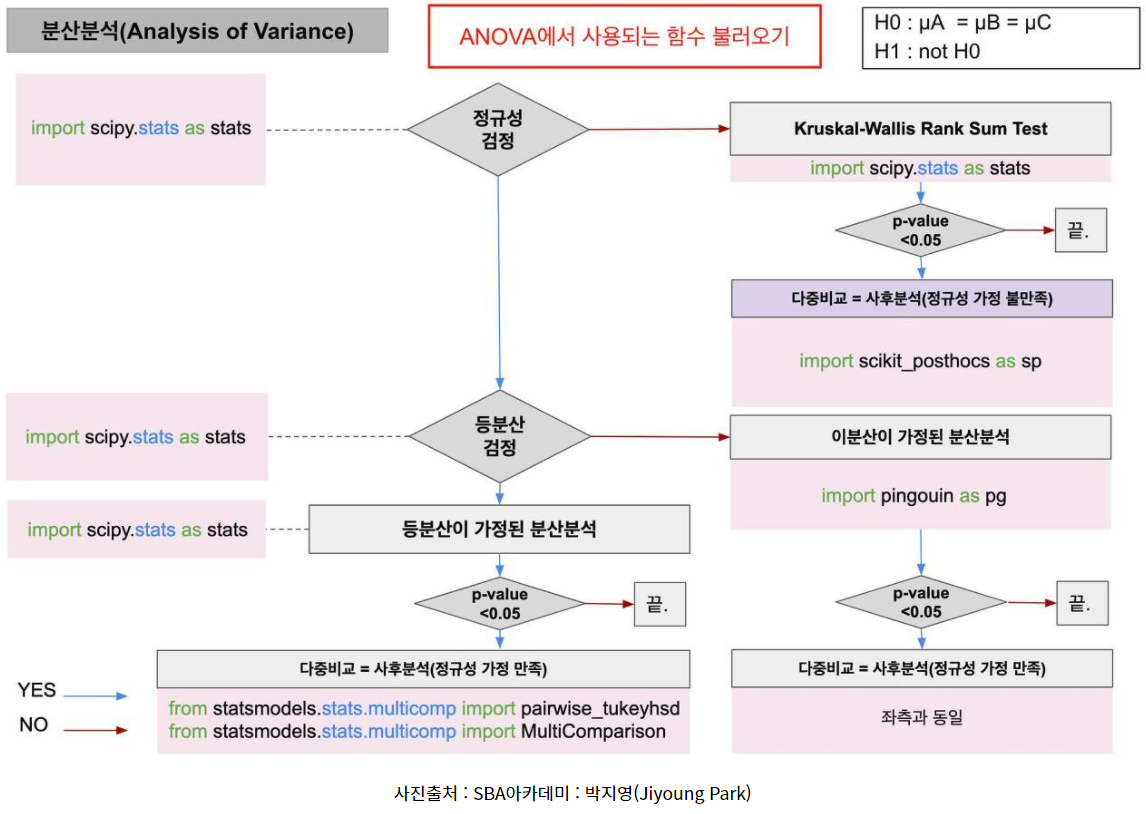

#### +2) 등분산성 검정
- 귀무가설 : 집단 간 분산이 동일하다.
- 대립가설 : 집단 간 분산이 동일하지 않다.

In [43]:
# 등분산성 검정
print(stats.bartlett(x1,x2,x3),stats.fligner(x1, x2, x3) ,stats.levene(x1, x2, x3), sep="\n")

BartlettResult(statistic=12.715821612319303, pvalue=0.0017329834708790929)
FlignerResult(statistic=11.213800436164078, pvalue=0.0036724354814778467)
LeveneResult(statistic=7.717166668807092, pvalue=0.0011619278370923346)


In [44]:
# 전체 업종에 대해 정규성 검정
def normality_test(indus):
    data_indus = final_gang[final_gang['업종명'] == indus]
    x1 = np.array(data_indus[data_indus.group == 0].매출금액합계)
    x2 = np.array(data_indus[data_indus.group == 1].매출금액합계)
    x3 = np.array(data_indus[data_indus.group == 2].매출금액합계)
    norm_dict = {'업종명':[indus],'저소득 정규성 p_value':[stats.shapiro(x1).pvalue],'중위소득 정규성 p_value':[stats.shapiro(x2).pvalue],'고소득 정규성 p_value':[stats.shapiro(x3).pvalue], '등분산성 p_value':[stats.levene(x1, x2, x3).pvalue]}
    df_normality = pd.DataFrame(norm_dict)
    
    return df_normality

In [45]:
total_normality = pd.DataFrame()
for ind in high_coef_lst:
    df_normality = normality_test(ind)
    total_normality = pd.concat([total_normality, df_normality])

In [46]:
total_normality

,업종명,저소득 정규성 p_value,중위소득 정규성 p_value,고소득 정규성 p_value,등분산성 p_value
0,경양식/레스토랑,0.004756,5.068488e-06,0.127641,0.001162
0,화장품,0.000451,1.776192e-03,0.041237,0.001338
0,의료기기,0.002059,2.544351e-06,0.000701,0.124701
0,패스트푸드,0.001477,4.634273e-04,0.090523,0.317405
0,휴대폰,0.011039,2.475943e-07,0.931354,0.389595
0,스낵,0.021910,5.661593e-05,0.066134,0.579080
0,피부/비뇨기과,0.000631,2.829559e-06,0.003516,0.573088
0,남성의류,0.002032,5.619513e-04,0.007732,0.014745
0,관광,0.059382,1.268394e-05,0.000263,0.001403
0,주차장,0.000006,3.572299e-09,0.037467,0.011384


**업종별로 따졌을 때 모든 업종 정규성 따르지 않음**  
➡️**ANOVA 진행할 수 없으므로 비모수검정 진행**

## 7. 비모수검정(Kruskal-Wallis 검정)

Kruscal-Wallis Rank Sum Test : 집단 중 하나라도 정규성 가정이 깨질 때 사용하는 검정방식
- 귀무가설 : 세 그룹 간 매출금액의 크기(중위값, median)에 유의한 차이가 없다.
- 대립가설 : 세 그룹 간 매출금액의 크기(중위값, median)에 유의한 차이가 있다.

In [47]:
# 경양식/레스토랑 업종에 대한 비모수검정
stats.kruskal(final_gang_west.loc[final_gang_west.group == 0,"매출금액합계"],
             final_gang_west.loc[final_gang_west.group == 1,"매출금액합계"],
             final_gang_west.loc[final_gang_west.group == 2,"매출금액합계"])

KruskalResult(statistic=17.323623995052543, pvalue=0.0001730704194358428)

In [48]:
# 전체 업종에 대해 비모수검정 진행
def nonparam_test(indus):
    data_indus = final_gang[final_gang['업종명'] == indus]
    y1 = data_indus.loc[data_indus.group == 0,"매출금액합계"]
    y2 = data_indus.loc[data_indus.group == 1,"매출금액합계"]
    y3 = data_indus.loc[data_indus.group == 2,"매출금액합계"]
    nonparam_dict = {'업종명':[indus],'크루스칼 검정 p-value':[stats.kruskal(y1,y2,y3).pvalue]}
    df_nonparam = pd.DataFrame(nonparam_dict)
    
    return df_nonparam

In [49]:
total_nonparam = pd.DataFrame()
for ind in high_coef_lst:
    df_nonparam = nonparam_test(ind)
    total_nonparam = pd.concat([total_nonparam, df_nonparam])

In [50]:
total_nonparam

,업종명,크루스칼 검정 p-value
0,경양식/레스토랑,0.000173
0,화장품,0.000184
0,의료기기,0.000053
0,패스트푸드,0.000395
0,휴대폰,0.000155
0,스낵,0.002302
0,피부/비뇨기과,0.000745
0,남성의류,0.002864
0,관광,0.001339
0,주차장,0.000194


결과 해석 : **모든 업종에서 p-value값이 0.05보다 작으므로 귀무가설을 기각한다. 따라서 저소득 지역, 중위소득 지역, 고소득 지역 간에 매출금액 크기에 통계적으로 유의미한 차이가 있다.**

## 8. 사후검정(Post-hoc)

비모수 사후검정 방법
- DSCF(Dwass Steel Critchlow Fligner) 다중 비교 분석
https://www.facebook.com/groups/632755063474501/posts/1046595765423760/
- 직접 Mann-whitney U-test를 짝지어진 그룹별로 여러 차례 수행해서 p값 조정  
➡️ 조정 방법 : Bonferroni 방법  
   예) 4개 집단에서 2개 집단간의 차이를 보려면 4개 중 2개를 뽑는 조합에 따라 Mann-Whitney Test를 총 6번 수행

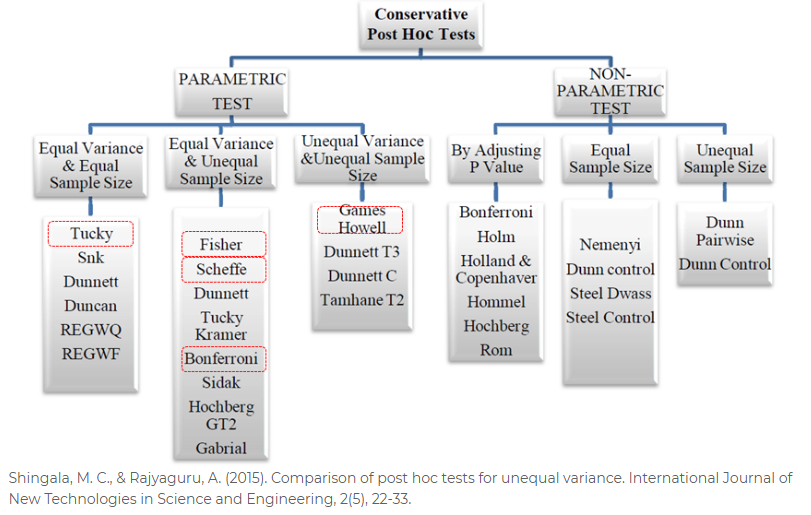

- 귀무가설 : 두 그룹 간 차이가 없다.
- 대립가설 : 두 그룹 간 차이가 있다.

In [51]:
import scikit_posthocs as sp

**1) Conover Test(Bonferroni 방법 이용)**

In [52]:
test = final_gang[final_gang['업종명'] == "관광"]

In [58]:
pc = sp.posthoc_conover(test,
                   val_col = '매출금액합계',
                   group_col = 'group',
                   p_adjust = 'holm')
# p_adjust : 다중비교(사후분석)의 방법
# 'holm' : Bonferroni 방법
# 결과값 : p-value값
pc

,0,1,2
0,1.000000,0.067535,0.000916
1,0.067535,1.000000,0.004586
2,0.000916,0.004586,1.000000


Text(0.5, 1.0, '관광')

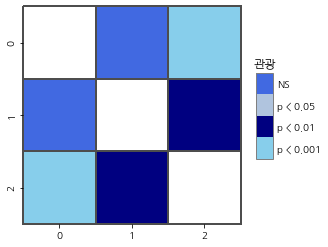

In [68]:
cmap = ["white","royalblue","skyblue","navy","lightsteelblue"]

heatmap_args = {'cmap':cmap,'linewidths': 0.25, 'linecolor': '0.3', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.rcParams["font.family"] = 'NanumGothic'
plt.title("관광")

결과 해석  
1. 저소득 지역(그룹 0)과 중위소득 지역(그룹 1) : 유의미한 차이(p값 = 0.005)
2. 저소득 지역(그룹 0)과 고소득 지역(그룹 2) : 유의미한 차이(p값 = 0.00003)
3. 중위소득 지역(그룹 1)과 고소득 지역(그룹 2) : 유의미한 차이(p값 = 0.003)

참고 : https://pythonrepo.com/repo/maximtrp-scikit-posthocs-python-science-and-data-analysis

In [71]:
# 전체 업종에 대해 heatmap 확인
def nonparam_heatmap(indus):
    data_indus = final_gang[final_gang['업종명'] == indus]
    pc = sp.posthoc_conover(data_indus,
                   val_col = '매출금액합계',
                   group_col = 'group',
                   p_adjust = 'holm')
    fix, ax = plt.subplots(figsize=(12, 6))
    cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
    heatmap_args = {'cmap':cmap, 'linewidths': 0.35, 'linecolor': '0.3',
                    'clip_on': False, 'square': True,
                'cbar_ax_bbox': [0.75, 0.35, 0.04, 0.3]}
    sp.sign_plot(pc, **heatmap_args)
    plt.title(indus)
    plt.show()

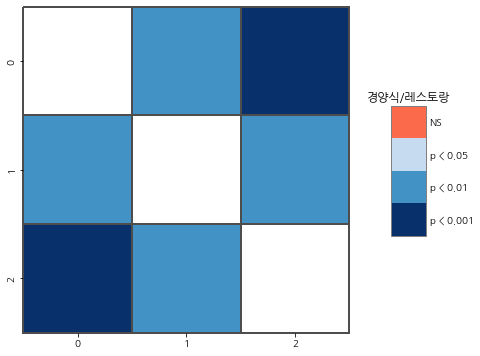

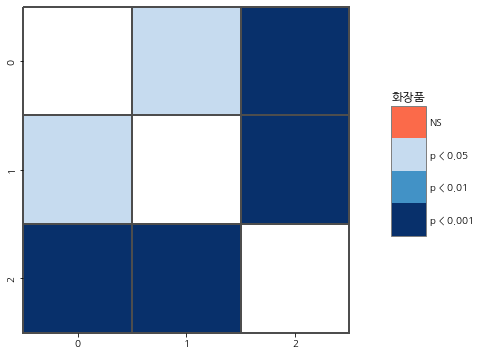

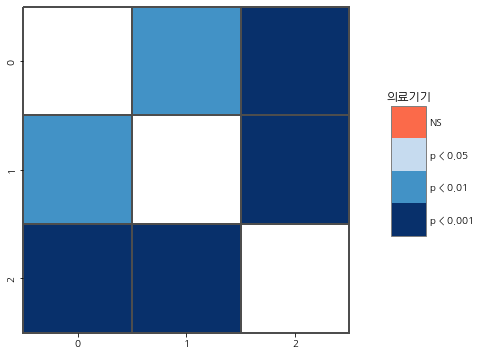

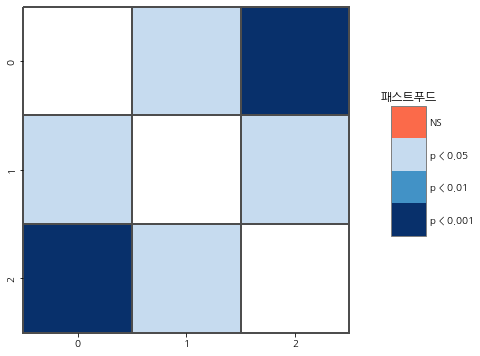

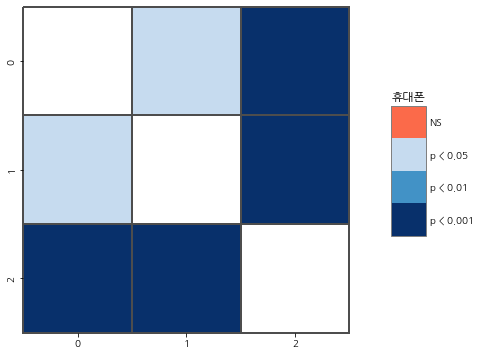

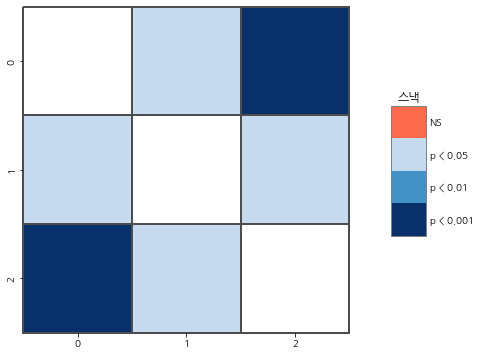

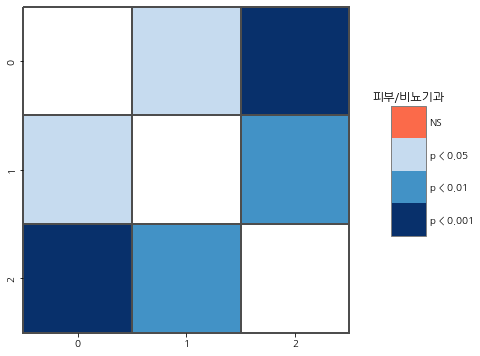

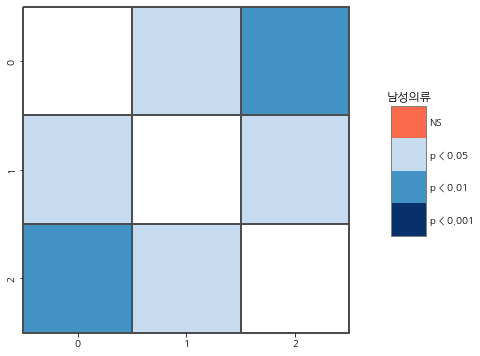

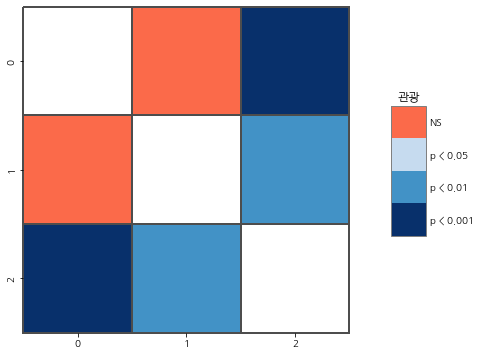

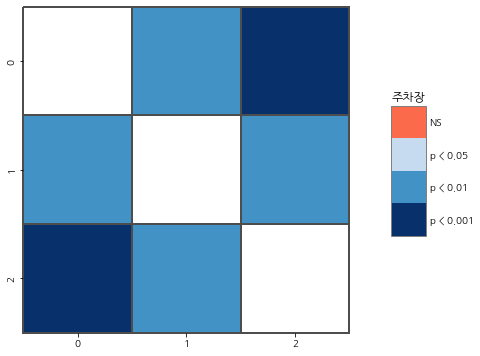

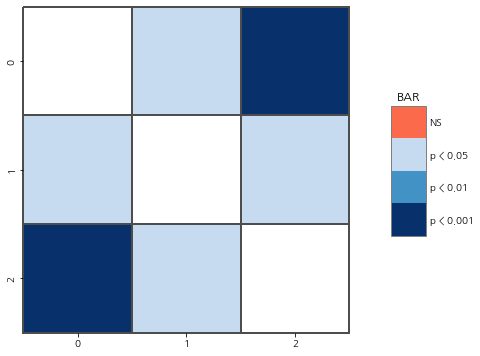

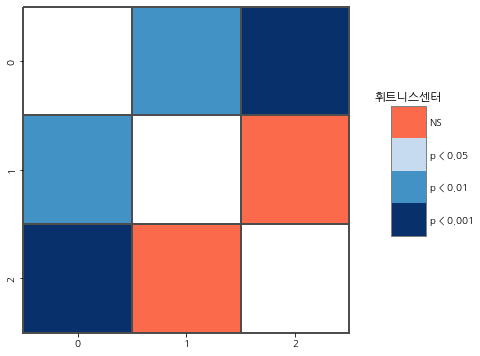

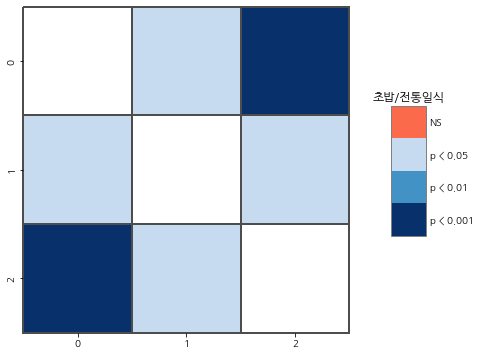

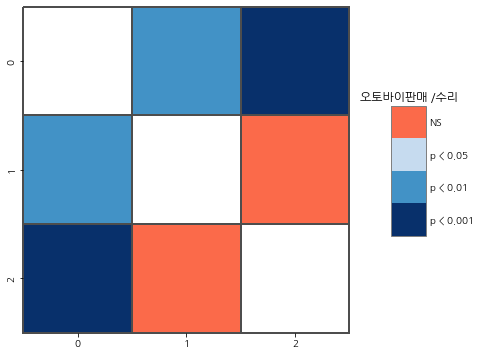

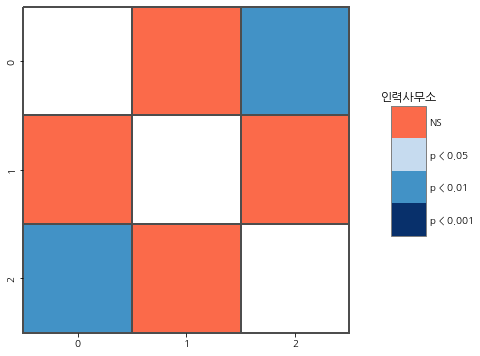

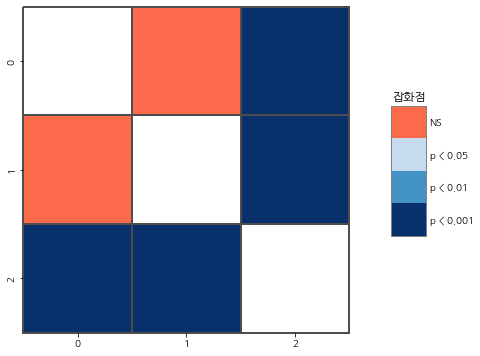

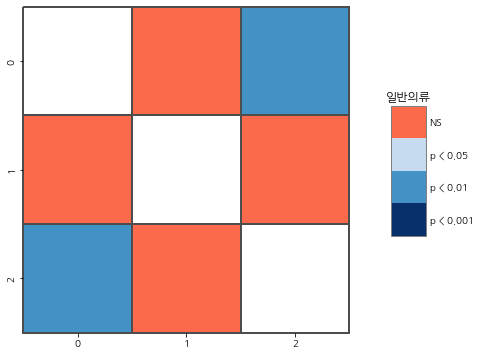

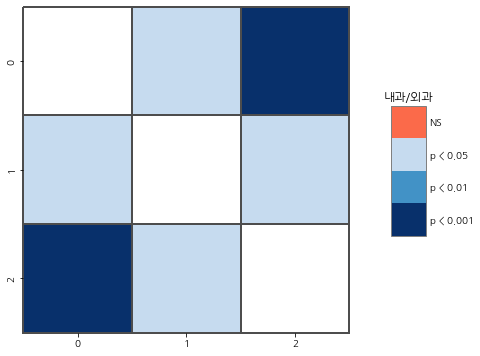

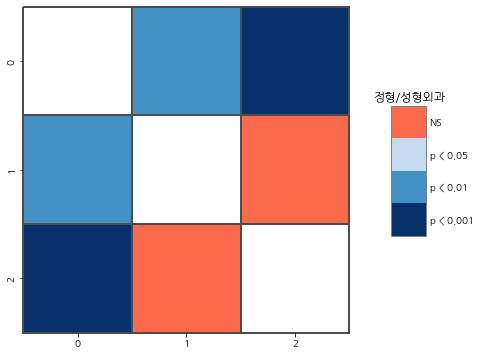

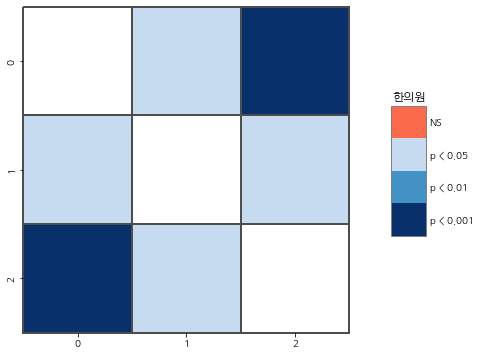

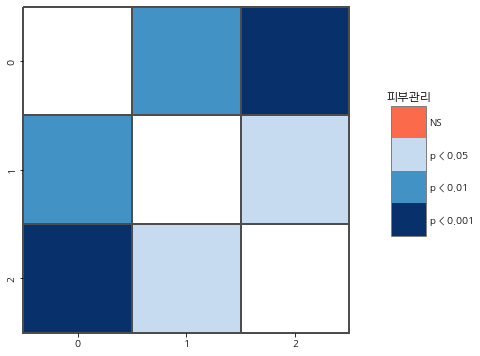

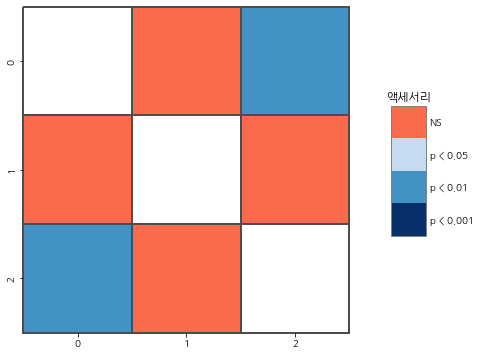

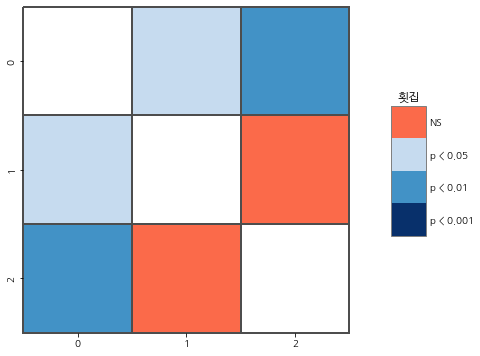

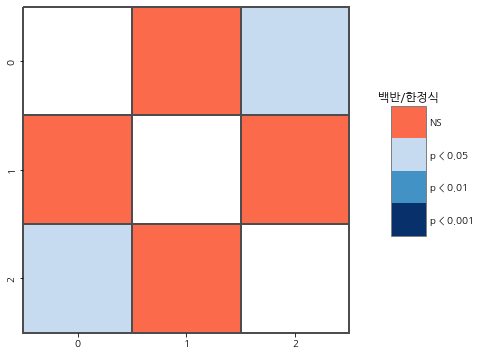

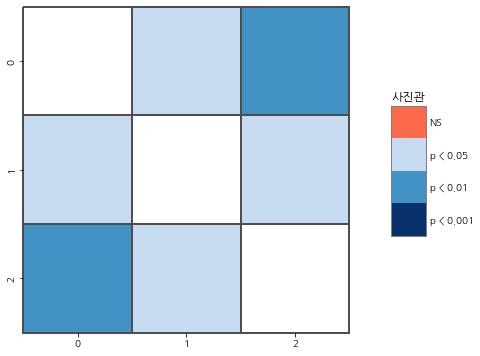

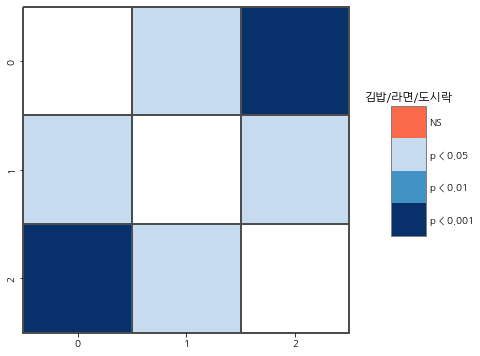

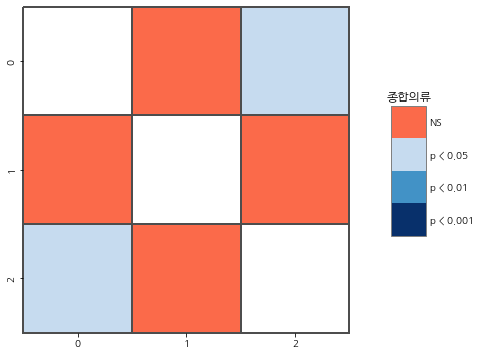

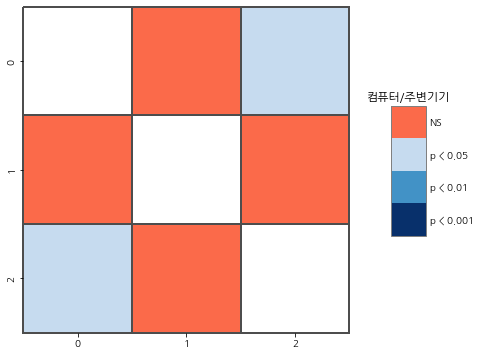

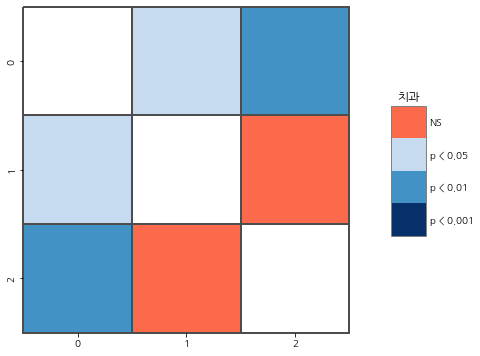

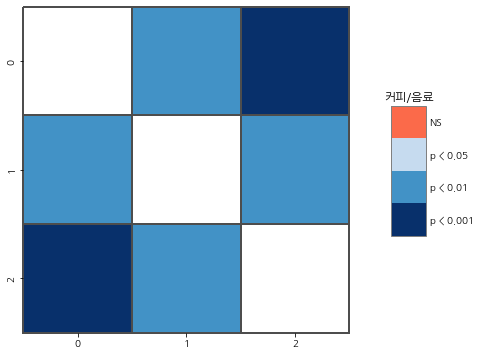

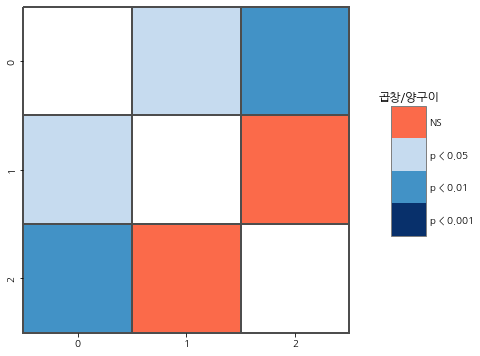

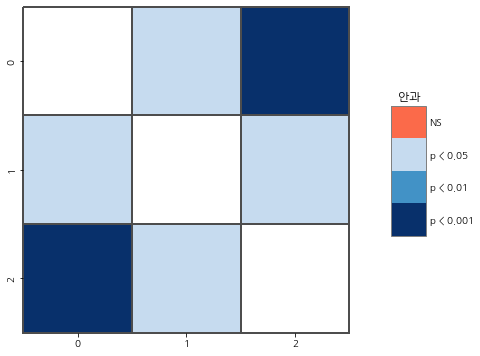

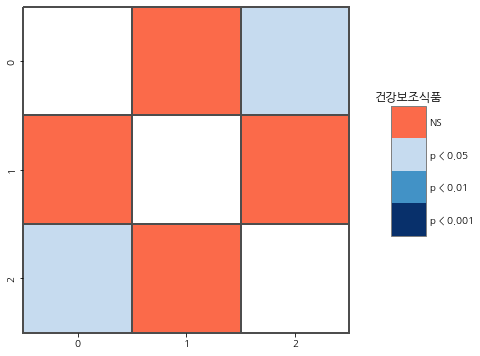

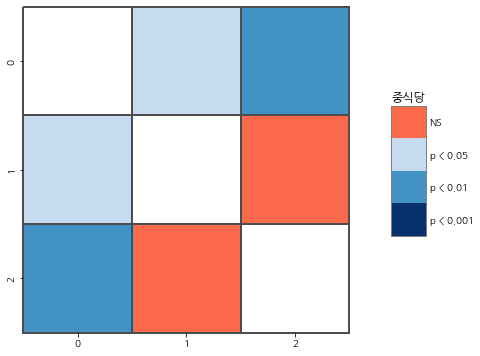

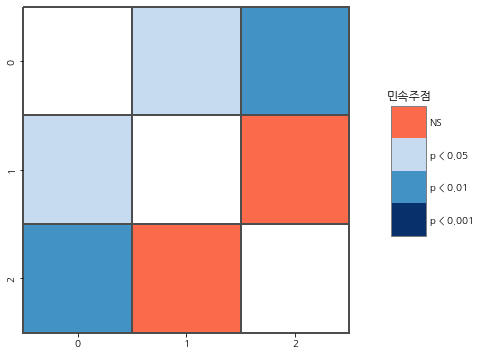

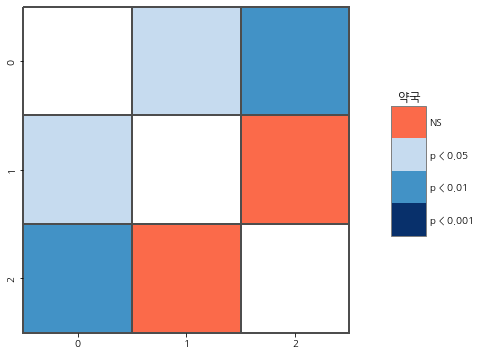

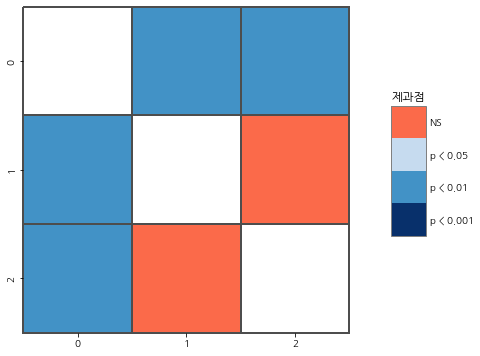

In [72]:
for ind in high_coef_lst:
    nonparam_heatmap(ind)

**p-값 0.01,0.03,0.05 기준으로 heatmap을 그리기 위한 데이터 생성**

In [57]:
def get_group(v):
    if v < 0.01:
        group = 'p<0.01'
    elif v < 0.03:
        group = 'p<0.03'
    elif v < 0.05:
        group = 'p<0.05'
    else:
        group = 'NS'
    return group

In [59]:
table = pc.stack().reset_index()
table.columns = ['x','y','p-value']
table["group"] = table["p-value"].apply(lambda v : get_group(v))

In [60]:
table

,x,y,p-value,group
0,0,0,1.000000,NS
1,0,1,0.067535,NS
2,0,2,0.000916,p<0.01
3,1,0,0.067535,NS
4,1,1,1.000000,NS
5,1,2,0.004586,p<0.01
6,2,0,0.000916,p<0.01
7,2,1,0.004586,p<0.01
8,2,2,1.000000,NS


In [ ]:
# p-value 값 : 0.05, 0.03, 0.01 기준으로 heatmap 생성(R 이용)
# ggplot(data_new, aes(x, y, fill = group)) + geom_tile(color = "black") + 
# scale_fill_manual(values = c("white","#d1495b", "#edae49", "#66a182")) +
# theme(legend.position = "top")

결과 : 각 업종별로 결과가 상이하다. p-값 기준을 0.03을 볼 때 상관관계가 높은 업종은 대부분 (저소득-중소득), (중소득-고소득), (저소득-고소득) 그룹 간 차이가 모두 유의하게 나타났다.

**2) Dwass, Steel, Critchlow, and Fligner test**

In [72]:
sp.posthoc_dscf(final_gang_west,
                   val_col = '매출금액합계',
                   group_col = 'group')

,0,2,1
0,1.000000,0.003780,0.015786
2,0.003780,1.000000,0.007049
1,0.015786,0.007049,1.000000


1. 저소득 지역(그룹 0)과 중위소득 지역(그룹 1) : 유의미한 차이(p값 = 0.016)
2. 저소득 지역(그룹 0)과 고소득 지역(그룹 2) : 유의미한 차이(p값 = 0.003)
3. 중위소득 지역(그룹 1)과 고소득 지역(그룹 2) : 유의미한 차이(p값 = 0.007)

참고 자료 : https://junsik-hwang.tistory.com/27